In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [106]:
df = pd.read_csv('placement.csv')

In [107]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package (in LPA)')

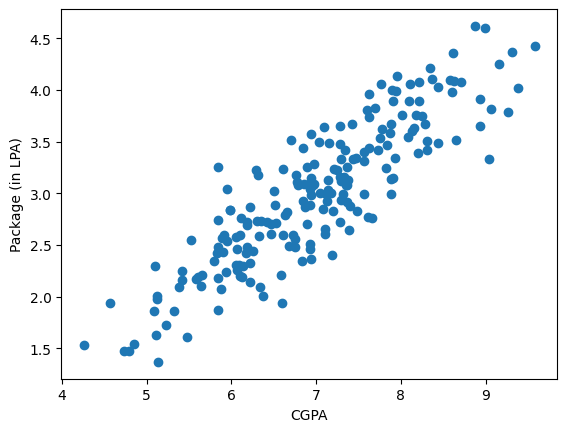

In [108]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')

In [109]:
X = df.iloc[:,0:1]
Y = df.iloc[:,-1]

In [110]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [111]:
Y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [113]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [114]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [115]:
Y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [116]:
# X_test[0] we cant fetch 1D column values like this
X_test.iloc[0] # by this way we get the 1D data frame

cgpa    8.58
Name: 112, dtype: float64

In [117]:
X_test.iloc[0].values

array([8.58])

In [118]:
# Y_test[0]
Y_test.iloc[0] # since column 1D Array

4.1

In [119]:
# lr.predict(X_test[0]) # will give error
# lr.predict(X_test.iloc[0]) # ValueError: Expected 2D array, got 1D array instead, hence we need to reshape it.
X_test.iloc[0]

cgpa    8.58
Name: 112, dtype: float64

In [120]:
X_test.iloc[0].values

array([8.58])

In [121]:
X_test.iloc[0].values.shape

(1,)

In [122]:
X_test.iloc[0].values.reshape(1,1)

array([[8.58]])

In [123]:
X_test.iloc[0].values.reshape(1,1).shape # made it to 2D

(1, 1)

In [124]:
lr.predict(X_test.iloc[0].values.reshape(1,1)) # model = 3.89111601, original = 4.10

/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [125]:
lr.predict(X_test.iloc[1].values.reshape(1,1)) # model = 3.09, original = 3.49

/home/jatin/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.09324469])

Text(0, 0.5, 'Package (in LPA)')

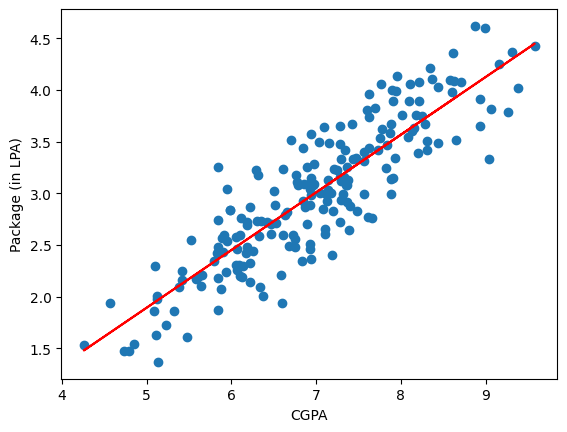

In [126]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train['cgpa'],lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')


In [127]:
m = lr.coef_  # slope  
m 

array([0.55795197])

In [128]:
b = lr.intercept_ # intercept
b

-0.8961119222429144

In [129]:
# equation of line y = mx + b

m * 8.58 + b # X_train first row

array([3.89111601])

In [130]:
m * 9.5 + b # cgpa = 9.5

array([4.40443183])

## Metrics in Regression

In [131]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [132]:
Y_pred = lr.predict(X_test)

In [133]:
Y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [134]:
Y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [135]:
print(f'Mean Absolute Error(MAE):{mean_absolute_error(Y_test,Y_pred)}')

Mean Absolute Error(MAE):0.2884710931878175


In [136]:
print(f'Mean Squared Error(MSE):{mean_squared_error(Y_test,Y_pred)}')

Mean Squared Error(MSE):0.12129235313495527


In [137]:
# print(f'Root Mean Squared Error(RMSE):{mean_squared_error(Y_test,Y_pred)**(1/2)}')
print(f'Root Mean Squared Error(RMSE):{np.sqrt(mean_squared_error(Y_test,Y_pred))}')

Root Mean Squared Error(RMSE):0.34827051717731616


In [138]:
print(f'R2 Score:{r2_score(Y_test,Y_pred)}')

R2 Score:0.780730147510384


## Adjusted R2-Score
    adjusted_r2_score = ((1-r2_score)(n-1))/(n-k-1)
    n = number of rows
    k = number of features

In [139]:
X_test.shape  # n = number of rows

(40, 1)

In [140]:
r = r2_score(Y_test,Y_pred)
adjusted = (( (1-r)*(40-1) ) / (40-1-1) ) # k =  1, since one input feature
print(f'Adjusted R2 Score:{adjusted}')

Adjusted R2 Score:0.2250401117656585


In [141]:
#np.random.seed(22) # to fix
new_df = df.copy()
new_df ['random_feature'] = np.random.random(200)

new_df = new_df[['cgpa','random_feature','package']]
new_df

,cgpa,random_feature,package
0,6.89,0.980866,3.26
1,5.12,0.807606,1.98
2,7.82,0.590262,3.25
3,7.42,0.789011,3.67
4,6.94,0.777393,3.57
...,...,...,...
195,6.93,0.406187,2.46
196,5.89,0.897883,2.57
197,7.21,0.897576,3.24
198,7.63,0.897722,3.96


Text(0, 0.5, 'Package')

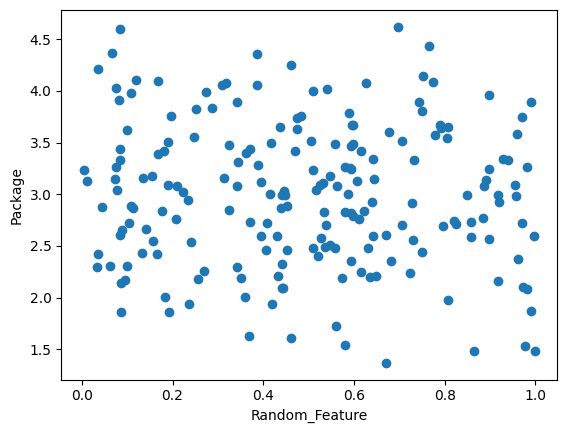

In [142]:
plt.scatter(x=new_df['random_feature'],y=new_df['package'])
plt.xlabel('Random_Feature')
plt.ylabel('Package')
# no pattern

In [143]:
X = new_df.iloc[:,0:2]
Y = new_df.iloc[:,-1]

In [144]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [145]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [146]:
Y_pred = lr.predict(X_test)

In [147]:
print(f'MAE:{mean_absolute_error(Y_test,Y_pred)}')

MAE:0.28866273161945266


In [148]:
print(f'MSE:{mean_squared_error(Y_test,Y_pred)}')

MSE:0.1215798399806995


In [149]:
print(f'R2_Score:{r2_score(Y_test,Y_pred)}')

R2_Score:0.7802104346296479


In [150]:
r = r2_score(Y_test,Y_pred)
adjusted = (((1-r)*(40-1))/(40-1-2))
print(f'Adjusted_R2 Score:{adjusted}')


Adjusted_R2 Score:0.23167008241739817
